In [1]:
# Imports
import glob
import chardet
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

In [ ]:
script_dir = os.path.dirname(os.path.abspath(__file__))
root_dir = os.path.abspath(os.path.join(script_dir, '..'))

In [ ]:
def combine_csvs_with_season():
    """ Combine all csv datasets into a single file with season tagging using two loops """

    csv_pattern = os.path.join(os.path.join(root_dir, "Data", "raw"), "TripB*")
    filenames = glob.glob(csv_pattern)

    # Read and merge CSVs using original code
    df_master = pd.DataFrame()
    for filename in filenames:
        df_trip = pd.read_csv(
            filename,
            sep=';',
            encoding=chardet.detect(open(filename, 'rb').read())['encoding']
        )
        df_master = pd.concat([df_master, df_trip])

    df_master.to_csv(os.path.join(root_dir, 'Data', 'processed', 'AllTrips.csv'), index=False)

    return df_master

In [5]:
combine_csvs_with_season()

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,Temperature Footweel Co-Driver [°C],Temperature Feetvent Co-Driver [°C],Temperature Feetvent Driver [°C],Temperature Head Co-Driver [°C],Temperature Head Driver [°C],Temperature Vent right [°C],Temperature Vent central right [°C],Temperature Vent central left [°C],Temperature Vent right [°C],Velocity [km/h]]]
0,0.0,0.0,511.0,0.0,0.0,-0.29,0.0,386.20,-2.10,6.0,...,6.42,8.87,7.82,9.48,9.13,6.68,7.03,6.86,6.16,NaN
1,0.1,0.0,511.0,0.0,0.0,-0.31,0.0,386.15,-2.63,6.0,...,6.42,8.87,7.82,9.48,9.13,6.68,7.03,6.86,6.16,NaN
2,0.2,0.0,511.0,0.0,0.0,-0.31,0.0,386.10,-3.18,6.0,...,6.42,8.87,7.82,9.48,9.13,6.68,7.03,6.86,6.16,NaN
3,0.3,0.0,511.0,0.0,0.0,-0.33,0.0,386.05,-3.53,6.0,...,6.42,8.87,7.79,9.44,9.11,6.68,7.03,6.86,6.15,NaN
4,0.4,0.0,511.0,0.0,0.0,-0.31,0.0,386.00,-3.88,6.0,...,6.40,8.79,7.70,9.31,9.06,6.66,7.01,6.83,6.12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8045,804.5,0.0,477.0,0.0,0.0,-0.35,0.0,346.80,-4.20,15.0,...,25.19,40.20,38.54,19.69,21.43,31.21,30.07,30.42,29.20,NaN
8046,804.6,0.0,477.0,0.0,0.0,-0.34,0.0,346.80,-4.24,15.0,...,25.19,40.20,38.54,19.69,21.43,31.21,30.07,30.42,29.20,NaN
8047,804.7,0.0,477.0,0.0,0.0,-0.35,0.0,346.80,-4.29,15.0,...,25.19,40.20,38.54,19.69,21.43,31.21,30.07,30.42,29.20,NaN
8048,804.8,0.0,477.0,0.0,0.0,-0.34,0.0,346.80,-4.30,15.0,...,25.19,40.20,38.54,19.69,21.43,31.21,30.07,30.42,29.20,NaN


In [ ]:
df = pd.read_csv(os.path.join(root_dir, 'Data', 'processed', 'AllTrips.csv'))

In [7]:
# Peek into the first 5 rows of the data
df.head()

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,Temperature Footweel Co-Driver [°C],Temperature Feetvent Co-Driver [°C],Temperature Feetvent Driver [°C],Temperature Head Co-Driver [°C],Temperature Head Driver [°C],Temperature Vent right [°C],Temperature Vent central right [°C],Temperature Vent central left [°C],Temperature Vent right [°C],Velocity [km/h]]]
0,0.0,0.0,511.0,0.0,0.0,-0.29,0.0,386.20,-2.10,6.0,...,6.42,8.87,7.82,9.48,9.13,6.68,7.03,6.86,6.16,NaN
1,0.1,0.0,511.0,0.0,0.0,-0.31,0.0,386.15,-2.63,6.0,...,6.42,8.87,7.82,9.48,9.13,6.68,7.03,6.86,6.16,NaN
2,0.2,0.0,511.0,0.0,0.0,-0.31,0.0,386.10,-3.18,6.0,...,6.42,8.87,7.82,9.48,9.13,6.68,7.03,6.86,6.16,NaN
3,0.3,0.0,511.0,0.0,0.0,-0.33,0.0,386.05,-3.53,6.0,...,6.42,8.87,7.79,9.44,9.11,6.68,7.03,6.86,6.15,NaN
4,0.4,0.0,511.0,0.0,0.0,-0.31,0.0,386.00,-3.88,6.0,...,6.40,8.79,7.70,9.31,9.06,6.66,7.01,6.83,6.12,NaN


In [8]:
# Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627092 entries, 0 to 627091
Data columns (total 49 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Time [s]                                627092 non-null  float64
 1   Velocity [km/h]                         610663 non-null  float64
 2   Elevation [m]                           627092 non-null  float64
 3   Throttle [%]                            627092 non-null  float64
 4   Motor Torque [Nm]                       627092 non-null  float64
 5   Longitudinal Acceleration [m/s^2]       627092 non-null  float64
 6   Regenerative Braking Signal             627092 non-null  float64
 7   Battery Voltage [V]                     627092 non-null  float64
 8   Battery Current [A]                     627092 non-null  float64
 9   Battery Temperature [°C]                627092 non-null  float64
 10  max. Battery Temperature [°C]           6270

In [9]:
# Data summary
df.describe()

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,Temperature Footweel Co-Driver [°C],Temperature Feetvent Co-Driver [°C],Temperature Feetvent Driver [°C],Temperature Head Co-Driver [°C],Temperature Head Driver [°C],Temperature Vent right [°C],Temperature Vent central right [°C],Temperature Vent central left [°C],Temperature Vent right [°C],Velocity [km/h]]]
count,627092.000000,610663.000000,627092.000000,627092.000000,627092.000000,627092.000000,627092.000000,627092.000000,627092.000000,627092.000000,...,622453.000000,622453.000000,622453.000000,622453.000000,622453.000000,622453.000000,622453.000000,622453.000000,622453.000000,16429.00000
mean,1152.727987,45.789707,514.248835,27.334374,11.730694,-0.010618,0.041388,371.546549,-18.716962,10.240706,...,23.534749,40.691820,40.039075,19.101404,20.594338,31.070091,30.186376,32.298176,28.990464,41.41931
std,1036.532583,37.269542,47.471604,19.903026,34.091080,0.614530,0.198973,12.585229,49.465341,4.755254,...,5.743584,10.166118,10.325675,3.349214,3.239581,6.437701,6.532453,7.552862,6.084918,25.66614
min,0.000000,0.000000,437.000000,0.000000,-87.500000,-9.030000,0.000000,301.800000,-404.380000,-1.000000,...,-2.220000,-3.180000,-3.090000,0.840000,2.060000,-2.480000,-2.480000,-2.660000,-1.520000,0.00000
25%,414.100000,10.700000,481.330000,0.000000,0.000000,-0.240000,0.000000,363.900000,-36.050000,7.000000,...,22.130000,37.760000,37.144430,18.540000,20.180000,29.290000,28.218090,29.050000,27.400000,26.05000
50%,855.100000,43.340000,498.000000,32.800000,6.500000,-0.040000,0.000000,372.710000,-13.930000,10.000000,...,24.430000,41.140000,39.610000,20.080000,21.660000,31.560000,31.090000,32.340000,29.510000,42.06000
75%,1534.500000,72.780000,530.000000,43.650000,23.000000,0.180000,0.000000,381.480000,-3.070000,13.000000,...,26.590000,45.180000,44.260000,21.150000,22.430000,33.300000,33.130000,35.460000,31.090000,54.78000
max,5610.100000,152.260000,655.000000,135.250000,244.000000,4.460000,1.000000,394.190000,144.490000,22.000000,...,40.550000,61.230000,62.110000,24.050000,25.880000,45.170000,44.300000,50.760000,43.780000,130.15000


In [10]:
# Remove SOC derived or duplicate columns, keep actual reading over sensor versions

drop_features = [
    "Time [s]", "max. Battery Temperature [°C]", "displayed SoC [%]", "min. SoC [%]", "max. SoC [%)", 
    "Ambient Temperature Sensor [°C]", "Requested Coolant Temperature [°C]", "Temperature Vent right [°C]",
    "Velocity [km/h]]]", "Requested Heating Power [W]"
]

df.drop(drop_features, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627092 entries, 0 to 627091
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Velocity [km/h]                         610663 non-null  float64
 1   Elevation [m]                           627092 non-null  float64
 2   Throttle [%]                            627092 non-null  float64
 3   Motor Torque [Nm]                       627092 non-null  float64
 4   Longitudinal Acceleration [m/s^2]       627092 non-null  float64
 5   Regenerative Braking Signal             627092 non-null  float64
 6   Battery Voltage [V]                     627092 non-null  float64
 7   Battery Current [A]                     627092 non-null  float64
 8   Battery Temperature [°C]                627092 non-null  float64
 9   SoC [%]                                 596299 non-null  float64
 10  Heating Power CAN [kW]                  6270

In [11]:
def plot_dataframe_subplots(df, nrows, ncols, figsize=(30, 24)):
    """Plot a nrows x ncols grid of the df variables"""
    measurements = list(df.columns)
    plt.figure(figsize=figsize)
    for idx, key in enumerate(measurements):
        plt.subplot(nrows, ncols, idx+1)
        plt.plot(np.array(range(df.shape[0]))*0.1, df[key], color='g')
        plt.ylabel(key)
        plt.grid(True)
        plt.xlabel("DataPoints")
        plt.show

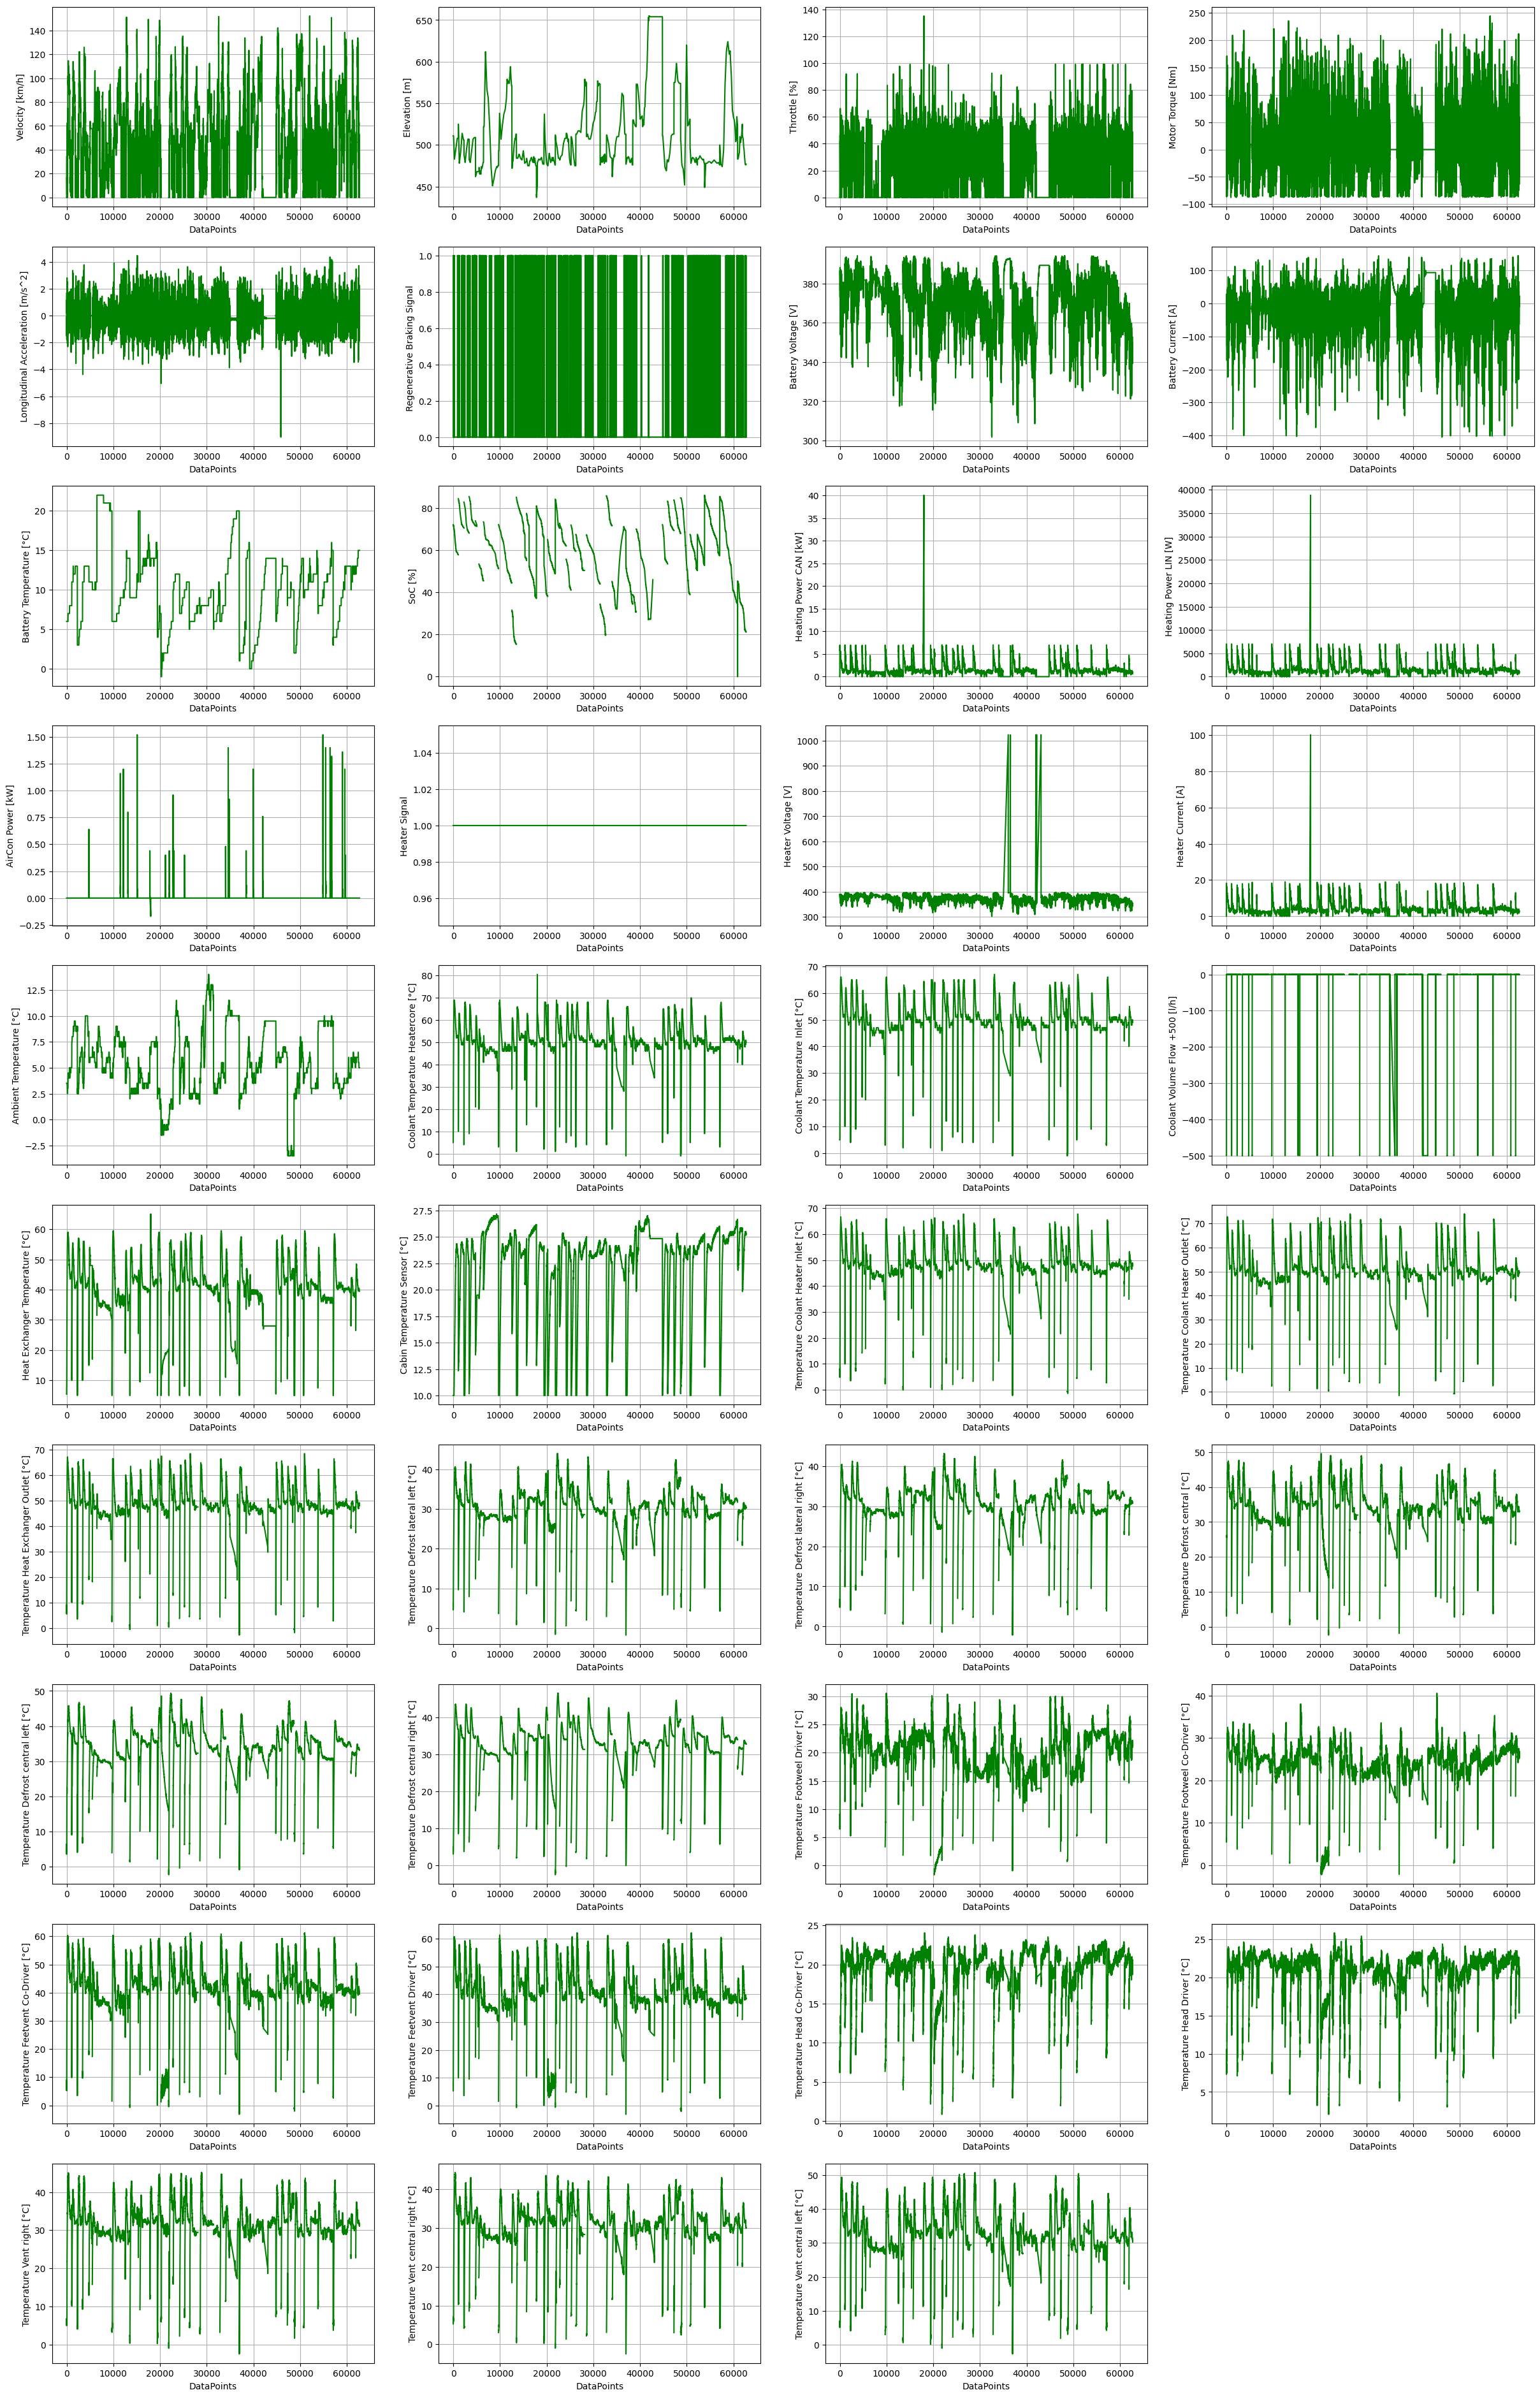

In [12]:
# Plotting the fields
plot_dataframe_subplots(df, nrows=10, ncols=4, figsize=(30, 48))

<Axes: >

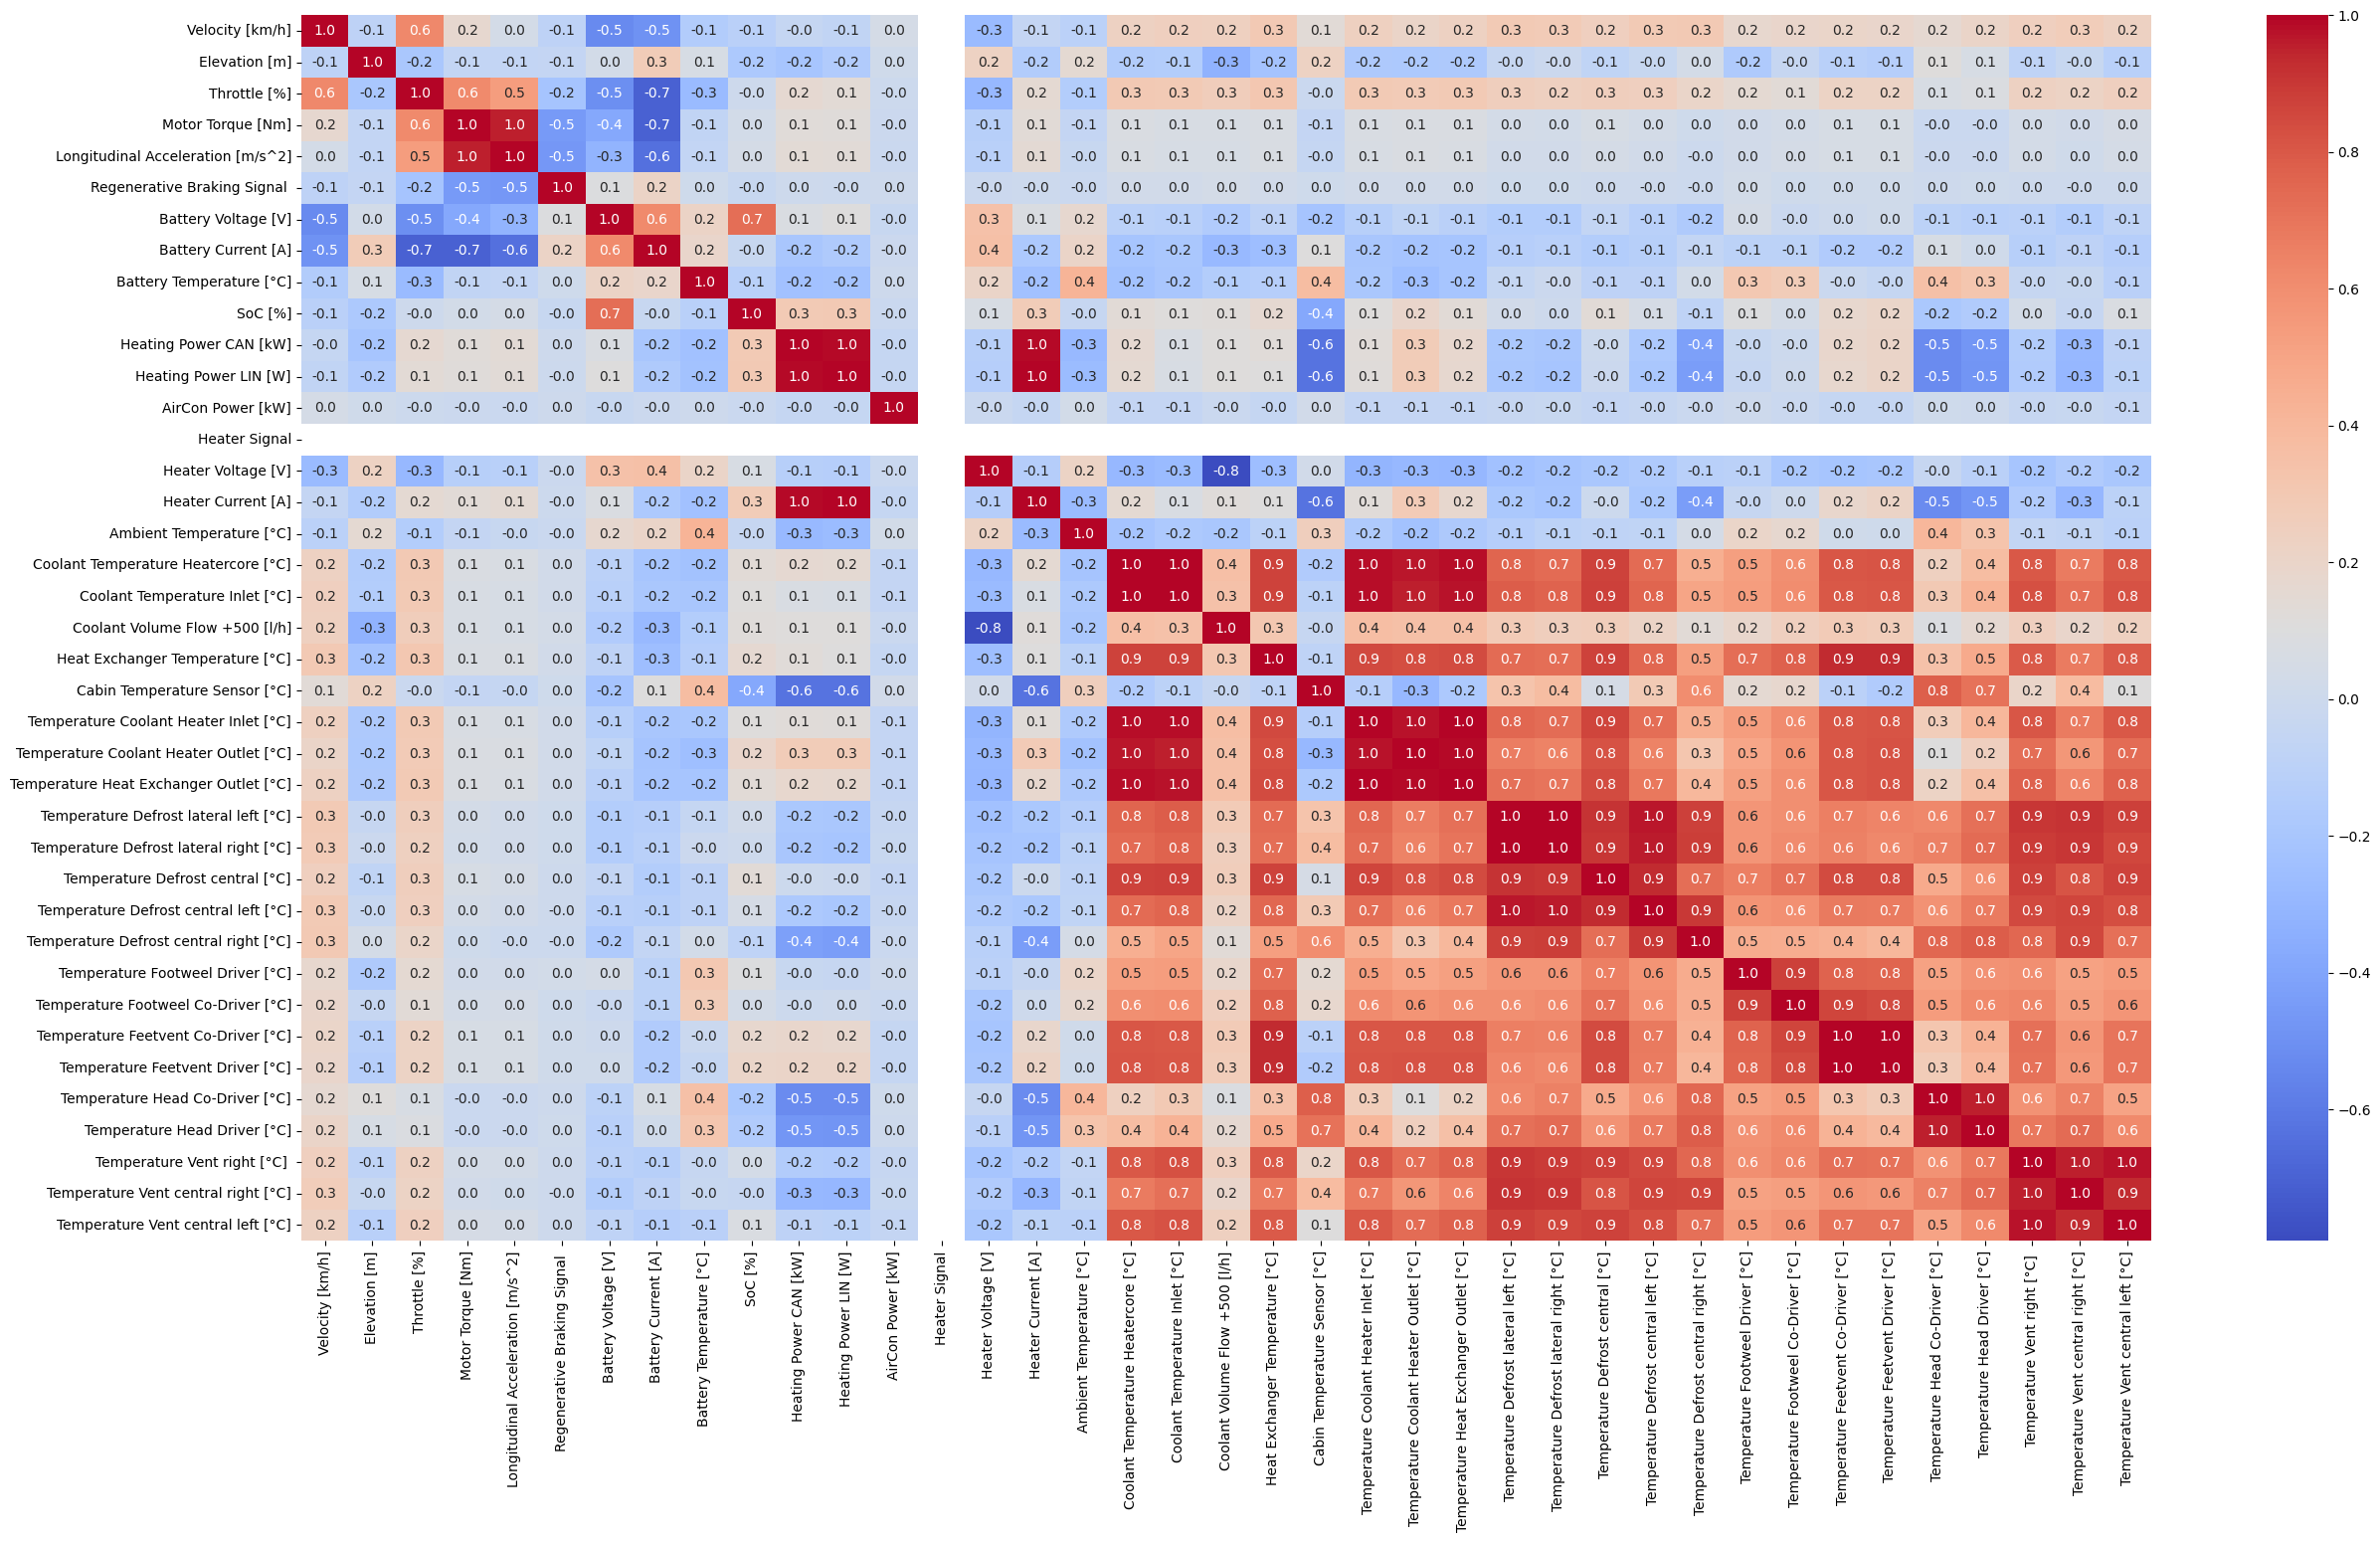

In [13]:
# Feature correlation
plt.figure(figsize=(30, 16))
sns.heatmap(df.corr(),annot=True, cbar=True, cmap='coolwarm', fmt='.1f')

In [14]:
# Removing duplicates rows
df.drop_duplicates(inplace=True)

In [15]:
# Checking for missing values (in percentage)
df.isnull().sum()*100/df.shape[0]

Velocity [km/h]                           2.620417
Elevation [m]                             0.000000
Throttle [%]                              0.000000
Motor Torque [Nm]                         0.000000
Longitudinal Acceleration [m/s^2]         0.000000
Regenerative Braking Signal               0.000000
Battery Voltage [V]                       0.000000
Battery Current [A]                       0.000000
Battery Temperature [°C]                  0.000000
SoC [%]                                   4.908737
Heating Power CAN [kW]                    0.000000
Heating Power LIN [W]                     0.000000
AirCon Power [kW]                         0.000000
Heater Signal                             0.000000
Heater Voltage [V]                        0.000000
Heater Current [A]                        0.000000
Ambient Temperature [°C]                  0.000000
Coolant Temperature Heatercore [°C]       0.000000
Coolant Temperature Inlet [°C]            0.000000
Coolant Volume Flow +500 [l/h] 

In [16]:
# Checking for outliers in the data
def plot_dataframe_outliers(df, nrows, ncols, figsize=(30, 24)):
    """Plot a nrows x ncols grid of the df variables"""
    measurements = list(df.columns)
    plt.figure(figsize=figsize)
    for idx, key in enumerate(measurements):
        plt.subplot(nrows, ncols, idx+1)
        plt.boxplot(df[key])
        plt.ylabel(key)
        plt.grid(True)
        plt.xlabel("DataPoints")
        plt.tight_layout()
        plt.show

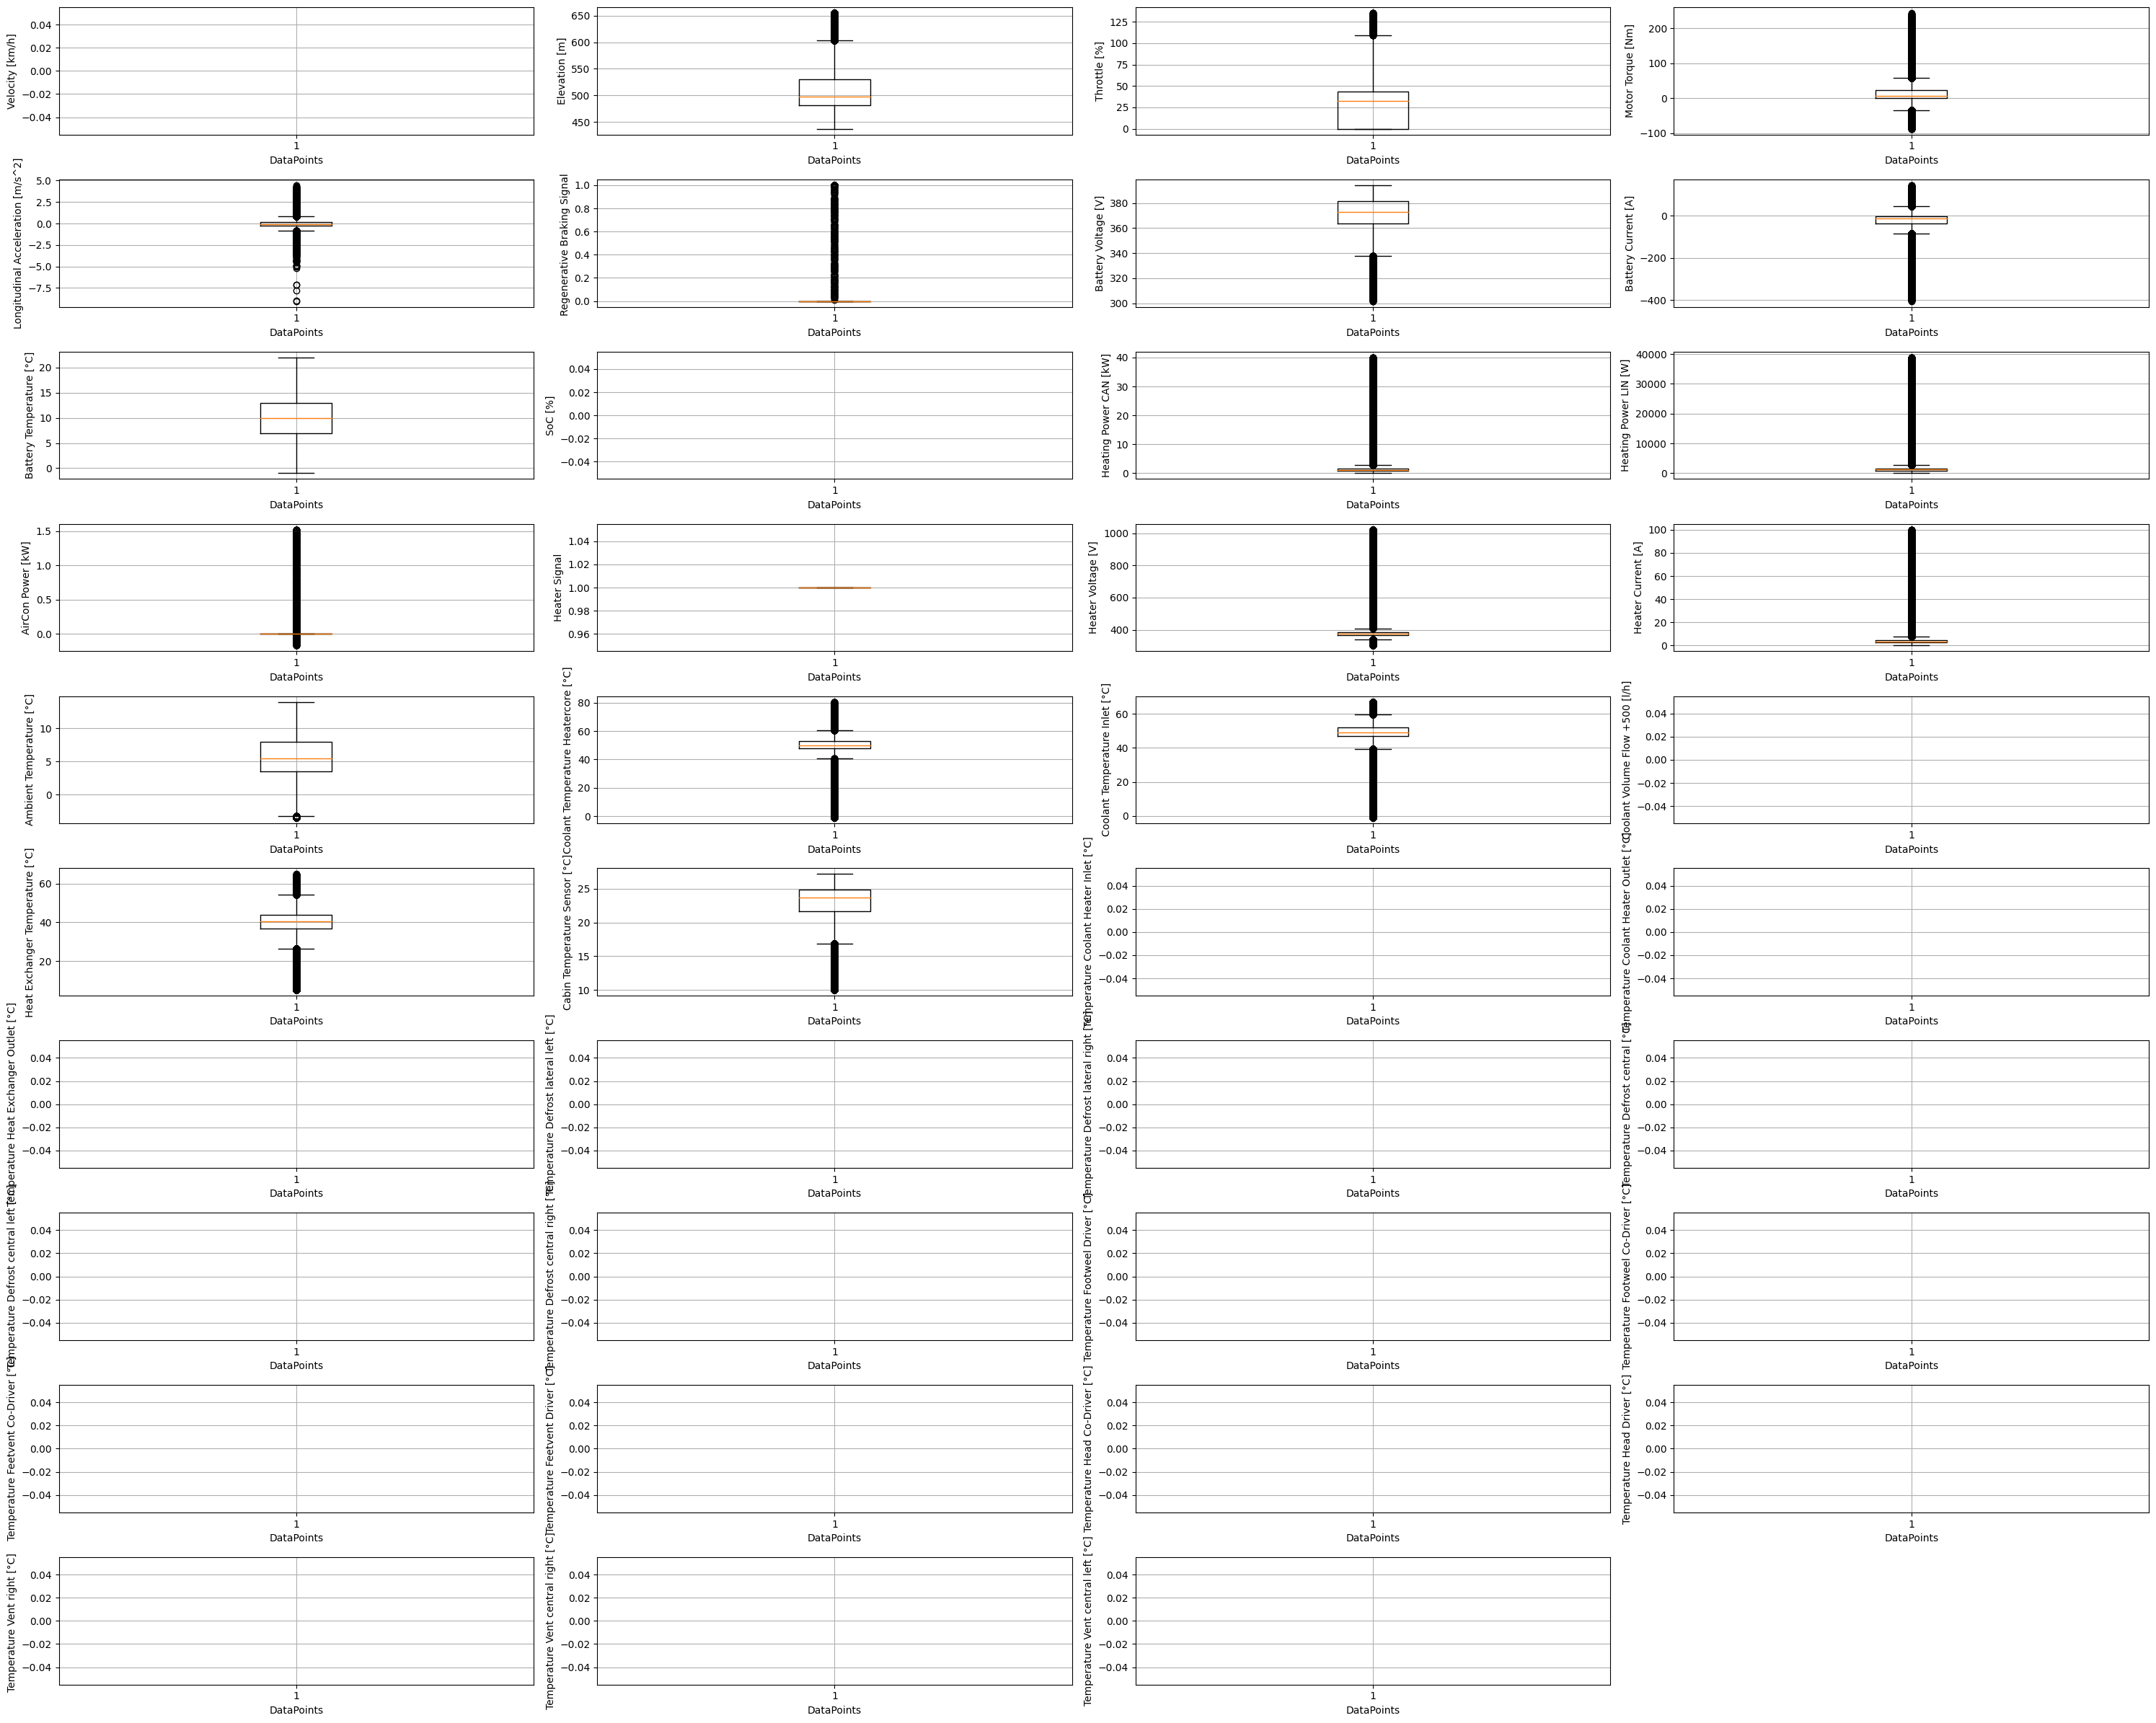

In [17]:
plot_dataframe_outliers(df, nrows=10, ncols=4, figsize=(30, 24))

In [18]:
# Replacing missing values with the median of the data

for feature in df.columns:
    df[feature].fillna(df[feature].median(), inplace=True)

In [19]:
# checking if the missing values have been filled with median of the respective features
df.isnull().sum()

Velocity [km/h]                           0
Elevation [m]                             0
Throttle [%]                              0
Motor Torque [Nm]                         0
Longitudinal Acceleration [m/s^2]         0
Regenerative Braking Signal               0
Battery Voltage [V]                       0
Battery Current [A]                       0
Battery Temperature [°C]                  0
SoC [%]                                   0
Heating Power CAN [kW]                    0
Heating Power LIN [W]                     0
AirCon Power [kW]                         0
Heater Signal                             0
Heater Voltage [V]                        0
Heater Current [A]                        0
Ambient Temperature [°C]                  0
Coolant Temperature Heatercore [°C]       0
Coolant Temperature Inlet [°C]            0
Coolant Volume Flow +500 [l/h]            0
Heat Exchanger Temperature [°C]           0
Cabin Temperature Sensor [°C]             0
Temperature Coolant Heater Inlet

In [20]:
# Removing the features with zero variance

feat_lst = []
for feature in df.columns:
    if df[feature].var() == 0:
        feat_lst.append(feature)

print(feat_lst)

['Heater Signal']


In [21]:
# Removing the features
df.drop(feat_lst, axis=1, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 626923 entries, 0 to 627091
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Velocity [km/h]                         626923 non-null  float64
 1   Elevation [m]                           626923 non-null  float64
 2   Throttle [%]                            626923 non-null  float64
 3   Motor Torque [Nm]                       626923 non-null  float64
 4   Longitudinal Acceleration [m/s^2]       626923 non-null  float64
 5   Regenerative Braking Signal             626923 non-null  float64
 6   Battery Voltage [V]                     626923 non-null  float64
 7   Battery Current [A]                     626923 non-null  float64
 8   Battery Temperature [°C]                626923 non-null  float64
 9   SoC [%]                                 626923 non-null  float64
 10  Heating Power CAN [kW]                  626923 no

<h1> Correlation vs. XGBoost for Finding Important Features for Prediction ML Model</h1>

<h2> Why Not Just Use Correlation?</h2>
<ul>
  <li>Only captures <strong>linear</strong> relationships.</li>
  <li>Misses <strong>non-linear patterns</strong> (e.g., thresholds, plateaus).</li>
  <li>Ignores <strong>feature interactions</strong> (e.g., Throttle × Speed).</li>
  <li>Can be <strong>misleading</strong> if data has outliers or skew.</li>
</ul>
<p><em>Example: Heater power may only affect SoC significantly above 2kW. Correlation misses this, but XGBoost won’t.</em></p>

<h2> Why Use XGBoost?</h2>
<ul>
  <li>Handles <strong>non-linear and threshold-based logic</strong>.</li>
  <li>Captures <strong>feature interactions</strong> automatically.</li>
  <li>Built-in <strong>feature importance</strong> scoring.</li>
  <li>Robust to <strong>missing data</strong> and <strong>outliers</strong>.</li>
</ul>
<p>It learns rules like:</p>
<pre><code>if HeaterPower &gt; 2 and AmbientTemp &lt; 0:
    SoC drops faster
</code></pre>

<h2> Comparison Table</h2>
<table>
  <thead>
    <tr>
      <th>Feature</th>
      <th>Correlation</th>
      <th>XGBoost</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Captures non-linear patterns</td>
      <td>❌</td>
      <td>✅</td>
    </tr>
    <tr>
      <td>Handles feature interactions</td>
      <td>❌</td>
      <td>✅</td>
    </tr>
    <tr>
      <td>Robust to missing data</td>
      <td>❌</td>
      <td>✅</td>
    </tr>
    <tr>
      <td>Provides model-specific importance</td>
      <td>❌</td>
      <td>✅</td>
    </tr>
    <tr>
      <td>Quick to compute</td>
      <td>✅</td>
      <td>⚠️ Slower</td>
    </tr>
  </tbody>
</table>

<h2> Best Practice</h2>
<ul>
  <li>Use <strong>correlation</strong> to filter clearly irrelevant features.</li>
  <li>Use <strong>XGBoost</strong> to detect true, complex patterns.</li>
  <li>Combine both for optimal feature selection!</li>
</ul>


In [23]:
import re

# Clean column names: remove special characters, collapse multiple underscores, strip leading/trailing ones
def clean_column(name):
    # Replace all non-word characters (e.g., [, ], %, space) with underscore
    name = re.sub(r"[^\w]", "_", name)
    # Collapse multiple underscores into one
    name = re.sub(r"_+", "_", name)
    # Strip leading/trailing underscores
    name = name.strip("_")
    return name

# Apply to all columns
df.columns = [clean_column(col) for col in df.columns]

In [24]:
df.columns

Index(['Velocity_km_h', 'Elevation_m', 'Throttle', 'Motor_Torque_Nm',
       'Longitudinal_Acceleration_m_s_2', 'Regenerative_Braking_Signal',
       'Battery_Voltage_V', 'Battery_Current_A', 'Battery_Temperature_C',
       'SoC', 'Heating_Power_CAN_kW', 'Heating_Power_LIN_W', 'AirCon_Power_kW',
       'Heater_Voltage_V', 'Heater_Current_A', 'Ambient_Temperature_C',
       'Coolant_Temperature_Heatercore_C', 'Coolant_Temperature_Inlet_C',
       'Coolant_Volume_Flow_500_l_h', 'Heat_Exchanger_Temperature_C',
       'Cabin_Temperature_Sensor_C', 'Temperature_Coolant_Heater_Inlet_C',
       'Temperature_Coolant_Heater_Outlet_C',
       'Temperature_Heat_Exchanger_Outlet_C',
       'Temperature_Defrost_lateral_left_C',
       'Temperature_Defrost_lateral_right_C', 'Temperature_Defrost_central_C',
       'Temperature_Defrost_central_left_C',
       'Temperature_Defrost_central_right_C', 'Temperature_Footweel_Driver_C',
       'Temperature_Footweel_Co_Driver_C', 'Temperature_Feetvent_Co_Driv

In [25]:
def adjusted_r2_score(y_true, y_pred, n_features):
    """
    Compute Adjusted R² score.

    Parameters:
    - y_true: Ground truth values
    - y_pred: Predicted values
    - n_features: Number of predictors/features used

    Returns:
    - Adjusted R² score
    """
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)  # number of observations
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - n_features - 1)
    return adj_r2

RMSE: 1.243390652376129
R² adjusted score: 0.993282646784244


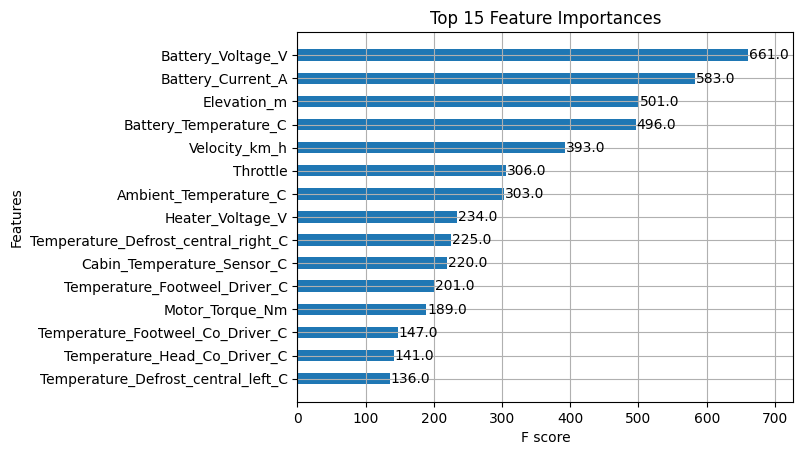

In [26]:
target = 'SoC'
df = df[df[target].notna()]  # drop rows with missing target
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² adjusted score:", adjusted_r2_score(y_test, y_pred, n_features=len(X_train.columns)))

xgb.plot_importance(model, max_num_features=15, height=0.5)
plt.title("Top 15 Feature Importances")
plt.show()

<h2> Understanding the XGBoost Feature Importance Plot (F Score)</h2>

<h3> What is F Score?</h3>
<p>
  In XGBoost, <strong>F score</strong> refers to the <em>number of times a feature is used to split the data</em> across all the trees in the model.
</p>

<ul>
  <li>Higher F score → the feature was used <strong>more frequently</strong>.</li>
  <li>It's a measure of how often a feature contributed to building trees, not how good it was.</li>
</ul>

<h3> How to Interpret It</h3>
<p>In your plot:</p>
<ul>
  <li><code>Battery_Voltage_V</code> has an F score of 726 → used the most.</li>
  <li><code>Battery_Current_A</code> and <code>Elevation_m</code> also have high F scores → important features.</li>
</ul>

<h3> What F Score is <em>not</em>:</h3>
<ul>
  <li>It does <strong>not measure accuracy impact</strong>.</li>
  <li>It does <strong>not mean the feature has a strong predictive relationship</strong>.</li>
</ul>

<h3> Better Alternatives for Importance</h3>
<p>You can use other importance types with XGBoost:</p>

<pre><code>xgb.plot_importance(model, importance_type='gain')</code></pre>

<table>
  <thead>
    <tr>
      <th>Type</th>
      <th>Meaning</th>
      <th>When to Use</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>weight</code> (default)</td>
      <td>F score = how often the feature is used in splits</td>
      <td>To see frequency of use</td>
    </tr>
    <tr>
      <td><code>gain</code></td>
      <td>Average gain from splits using the feature</td>
      <td><strong>Best for judging importance</strong></td>
    </tr>
    <tr>
      <td><code>cover</code></td>
      <td>Average number of observations affected</td>
      <td>To understand sample coverage</td>
    </tr>
  </tbody>
</table>

<h3> Summary</h3>
<ul>
  <li>Use <code>weight</code> to see which features are used most.</li>
  <li>Use <code>gain</code> to see which features help the model the most.</li>
  <li>You can plot both to get a better picture!</li>
</ul>


RMSE: 1.243390652376129
R² adjusted score: 0.993282646784244


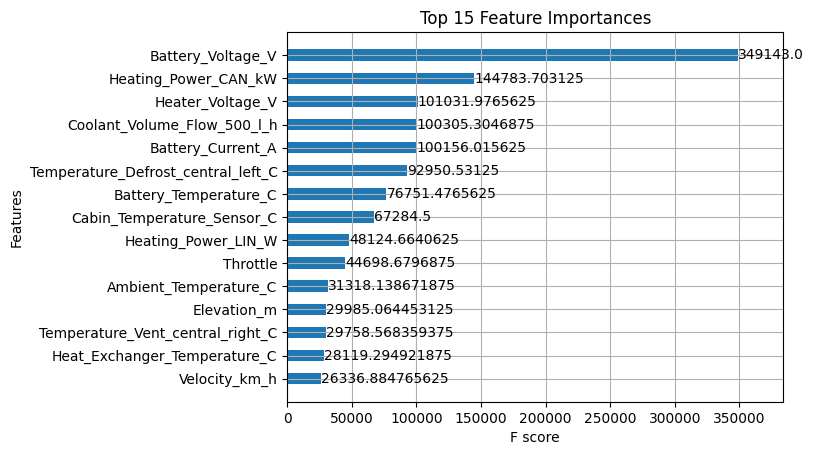

In [27]:
target = 'SoC'
df = df[df[target].notna()]  # drop rows with missing target
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² adjusted score:", adjusted_r2_score(y_test, y_pred, n_features=len(X_train.columns)))

xgb.plot_importance(model, max_num_features=15, height=0.5, importance_type='gain')
plt.title("Top 15 Feature Importances")
plt.show()

In [28]:
# Get feature importances (can be 'weight', 'gain', or 'cover')
feature_importance = model.get_booster().get_score(importance_type='gain')

# Calculate total
total = sum(feature_importance.values())

# Convert to list of (feature, percentage)
percentage_importance = [
    (feature, round((score / total) * 100, 2)) for feature, score in feature_importance.items()
]

# Sort by percentage descending
percentage_importance.sort(key=lambda x: x[1], reverse=True)

# Print top 15
for feature, pct in percentage_importance:
    print(f"{feature}: {pct}%")

Battery_Voltage_V: 22.86%
Heating_Power_CAN_kW: 9.48%
Heater_Voltage_V: 6.62%
Coolant_Volume_Flow_500_l_h: 6.57%
Battery_Current_A: 6.56%
Temperature_Defrost_central_left_C: 6.09%
Battery_Temperature_C: 5.03%
Cabin_Temperature_Sensor_C: 4.41%
Heating_Power_LIN_W: 3.15%
Throttle: 2.93%
Ambient_Temperature_C: 2.05%
Elevation_m: 1.96%
Temperature_Vent_central_right_C: 1.95%
Heat_Exchanger_Temperature_C: 1.84%
Velocity_km_h: 1.72%
Temperature_Defrost_central_C: 1.7%
Temperature_Defrost_central_right_C: 1.69%
Motor_Torque_Nm: 1.57%
Temperature_Footweel_Driver_C: 1.56%
Temperature_Head_Co_Driver_C: 1.24%
Temperature_Feetvent_Driver_C: 1.13%
Coolant_Temperature_Heatercore_C: 1.08%
Temperature_Coolant_Heater_Outlet_C: 0.87%
Temperature_Defrost_lateral_right_C: 0.83%
Temperature_Defrost_lateral_left_C: 0.76%
Temperature_Footweel_Co_Driver_C: 0.71%
Temperature_Heat_Exchanger_Outlet_C: 0.66%
Longitudinal_Acceleration_m_s_2: 0.62%
Temperature_Feetvent_Co_Driver_C: 0.4%
Temperature_Vent_right_C: 0.

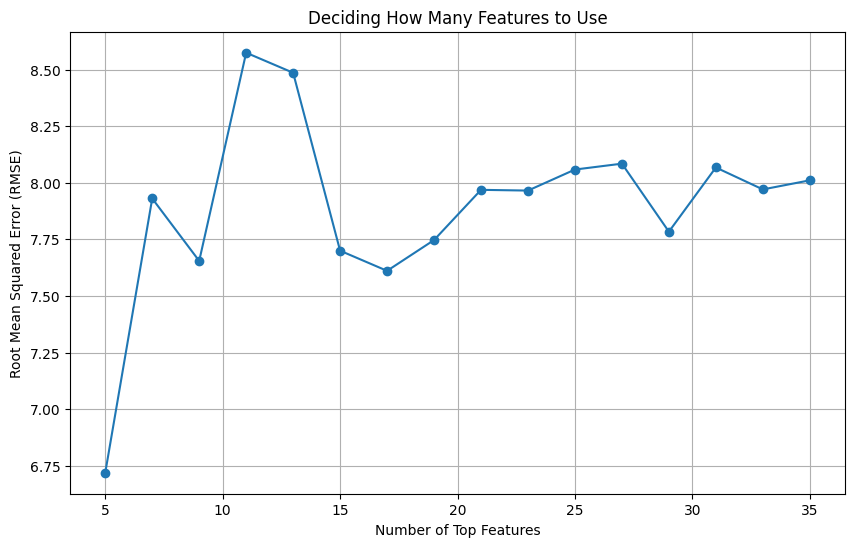

In [29]:
# Deciding how many features to use 

df_importance = pd.DataFrame(
    list(feature_importance.items()),
    columns=["Feature", "Importance (%)"]
).sort_values(by="Importance (%)", ascending=False)

results = []
for k in range(5, len(df_importance), 2):
    top_k = df_importance["Feature"].iloc[:k]
    X_k = X[top_k]
    model_k = xgb.XGBRegressor()
    score = cross_val_score(model_k, X_k, y, cv=3, scoring='neg_root_mean_squared_error').mean()
    results.append((k, -score))

# Split results for plotting
k_values, rmse_scores = zip(*results)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_scores, marker='o')
plt.xlabel('Number of Top Features')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Deciding How Many Features to Use')
plt.grid(True)
plt.show()

<h1>Optimal number of features = 5</h1>
<ul>
    <li>These top 5 features provide the best predictive power without adding noise or redundancy.</li>
    <li>Adding more features increases model complexity but doesn't improve accuracy, and may actually introduce irrelevant or correlated noise.</li>
</ul>

In [30]:
df_importance.head()

,Feature,Importance (%)
6,Battery_Voltage_V,349143.000000
9,Heating_Power_CAN_kW,144783.703125
12,Heater_Voltage_V,101031.976562
17,Coolant_Volume_Flow_500_l_h,100305.304688
7,Battery_Current_A,100156.015625


In [31]:
X = X[['Battery_Voltage_V', 'Heating_Power_CAN_kW', 'Heater_Voltage_V', 'Coolant_Volume_Flow_500_l_h', 'Battery_Current_A']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² adjusted score:", adjusted_r2_score(y_test, y_pred, n_features=len(X_train.columns)))

RMSE: 4.40948750948855
R² adjusted score: 0.9155405274208508
